In [1]:
from google.colab import files
uploaded=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [4]:
df=pd.read_csv('titanic.csv')
df.shape

(891, 12)

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
target = ['Survived']

In [8]:
X=df[features]
y=df[target]

In [9]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
X = df[features].copy()
y = df[target]


In [10]:
le_sex=LabelEncoder()
X['Sex']=le_sex.fit_transform(X['Sex'])

In [11]:
le_embarked=LabelEncoder()
X['Embarked']=le_embarked.fit_transform(X['Embarked'])

In [12]:
print(X.head(5))

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2


In [13]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [14]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [15]:
y_prediction=logreg.predict(X_test)

In [16]:
accuracy=accuracy_score(y_test,y_prediction)
precision=precision_score(y_test,y_prediction)
recall=recall_score(y_test,y_prediction)
f1=f1_score(y_test,y_prediction)

In [17]:
print("Accuracy  : ",accuracy)
print("Precision : ",precision)
print("recall    : ",recall)
print("F1        : ",f1)

Accuracy  :  0.8100558659217877
Precision :  0.7857142857142857
recall    :  0.7432432432432432
F1        :  0.7638888888888888


In [18]:
cm=confusion_matrix(y_test,y_prediction)

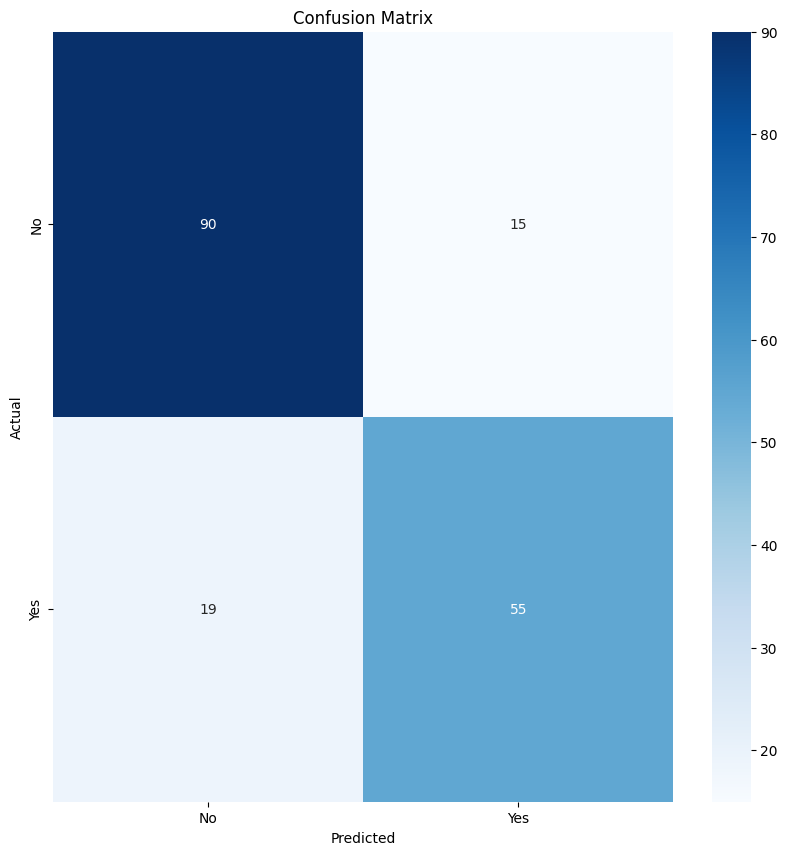

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues',
xticklabels=["No",'Yes'],yticklabels=["No","Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
y_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

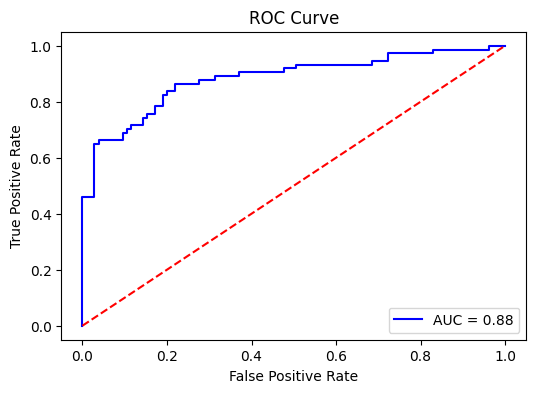

In [21]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()